In [4]:
import pandas as pd
from pandas import Series,DataFrame

In [5]:
location='/Users/mithleshpatel/anaconda2/zipzap/Data_File/'

In [6]:
titanic_df=pd.read_csv(location+'train.csv')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

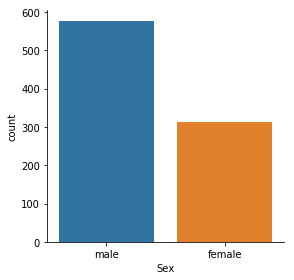

In [9]:
sns.factorplot('Sex',data=titanic_df,kind="count")

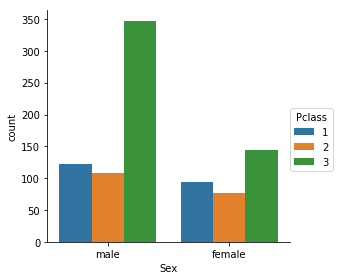

In [10]:
sns.factorplot('Sex',data=titanic_df,kind="count",hue="Pclass")

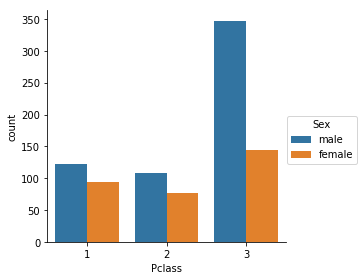

In [11]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue="Sex")

In [12]:
def male_female_child(passenger):
    age,sex=passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [13]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [14]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


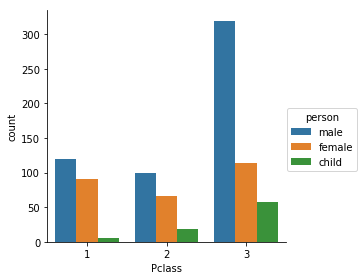

In [15]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue="person")

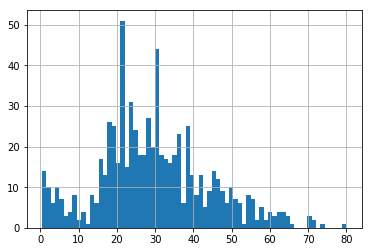

In [16]:
titanic_df['Age'].hist(bins=70)

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

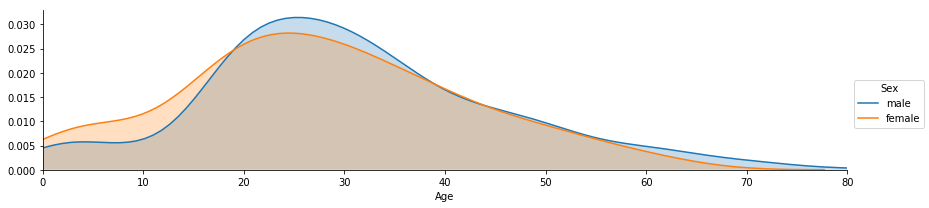

In [19]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

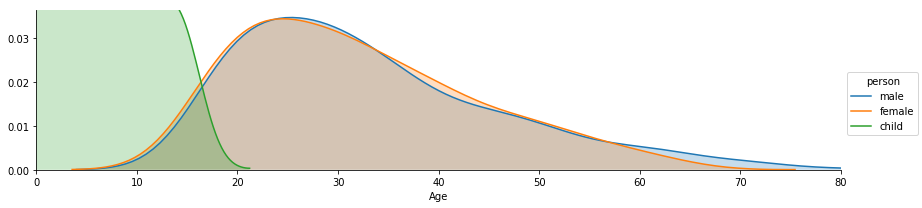

In [20]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

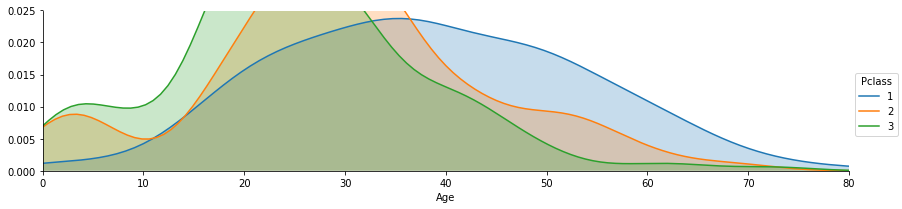

In [21]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
deck=titanic_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

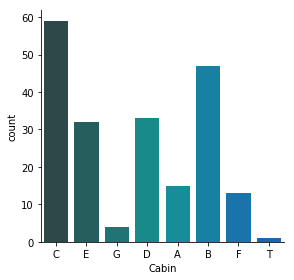

In [25]:
levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

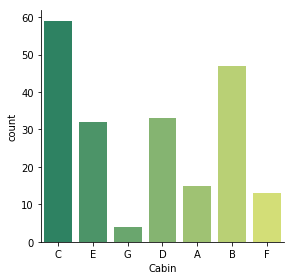

In [26]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

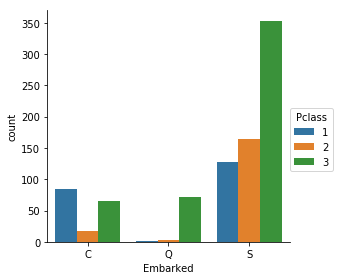

In [27]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=list('CQS'))

In [28]:
#who was with family and who was alone
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [30]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [31]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


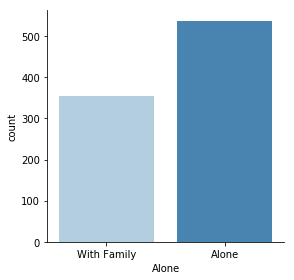

In [33]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

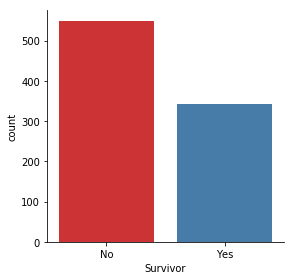

In [34]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'No',1:'Yes'})
sns.factorplot('Survivor',data=titanic_df,kind='count',legend=True,legend_out=True,palette='Set1')

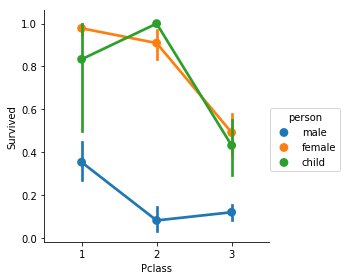

In [35]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

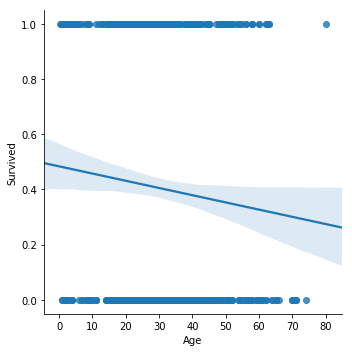

In [36]:
sns.lmplot('Age','Survived',data=titanic_df)

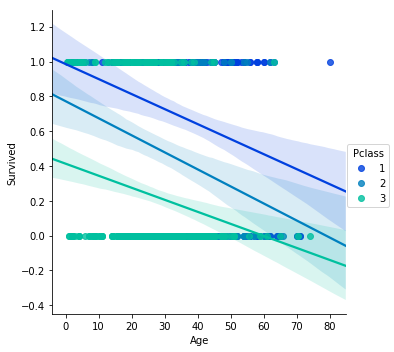

In [37]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter')

In [38]:
generations=[10,20,40,60,80]

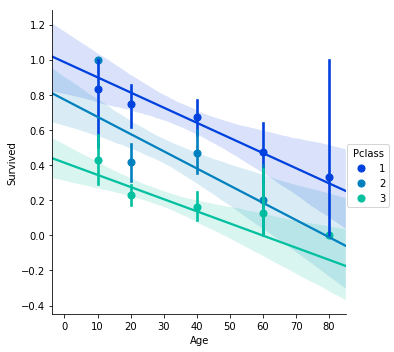

In [39]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

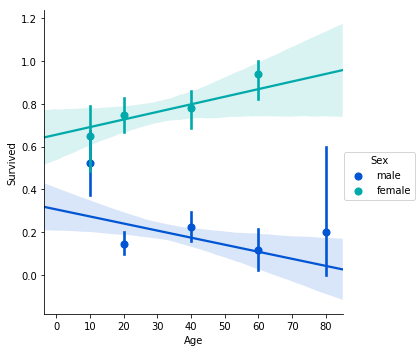

In [40]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)